In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import glob, os

In [4]:
i=0
# os.chdir("streetnr/newdata/test")
for file in glob.glob("data/test/*.png"):
    i +=1
    
print(i,file)

13068 data/test/image9601_344xx.png


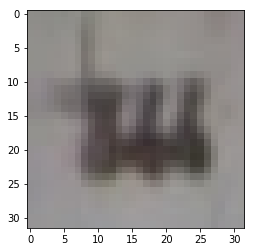

In [5]:
from skimage import io, transform

def im_show(image):
    plt.imshow(image)
    plt.show()
    
im_show(io.imread(os.path.join(file)))

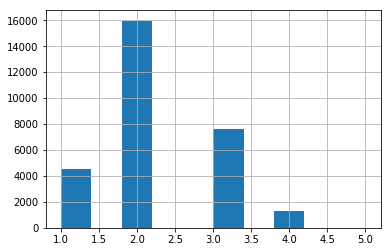

In [13]:
def make_csv(dir,files):
    f_dir = os.path.join(dir,files,"*.png")
    pics = []
    for file in glob.glob(f_dir):
        y = []
        num=0
        for i in (file.split("_")[1].split(".png")[0]):
            if i is not "x":
                y.append(int(i))
                num+=1
            else:
                y.append(10)
        pics.append({"filename":file,"y":y,"number":num})
    df = pd.DataFrame(pics)
    df.to_csv(os.path.join(dir,files +"_data.csv"))
    return df
    
    
make_csv('data','test')    

make_csv('data','valid')    
df = make_csv('data','train')    
df.number.hist()

In [14]:

from torch.utils.data import Dataset, DataLoader

class HouseNumbersDataset(Dataset):

    def __init__(self, csv_file,  transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.df = pd.read_csv(csv_file)
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_name = self.df.iloc[idx, 1]
        image = io.imread(img_name)
        sample = {'image': image, 'y': self.df.iloc[idx, 3]}

        if self.transform:
            sample = self.transform(sample)

        return sample


0 (32, 32, 3) [1, 9, 5, 10, 10]


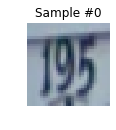

1 (32, 32, 3) [1, 9, 0, 3, 10]


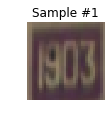

2 (32, 32, 3) [9, 10, 10, 10, 10]


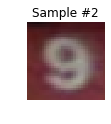

3 (32, 32, 3) [3, 6, 10, 10, 10]


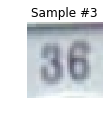

In [15]:
face_dataset = HouseNumbersDataset(csv_file='data/test_data.csv')

fig = plt.figure()

for i in range(len(face_dataset)):
    sample = face_dataset[i]

    print(i, sample['image'].shape, sample['y'])

    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    im_show(sample['image'])

    if i == 3:
        plt.show()
        break